# Import modules

In [1]:
import datetime
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tx_fast_hydrology.muskingum import Muskingum, ModelCollection, Connection
from tx_fast_hydrology.simulation import AsyncSimulation

# Load model collection

In [2]:
# Define model file input path
input_path = '../data/travis-county-hi-res-model.json'
# Load model collection from file
model_collection = ModelCollection.from_file(input_path)

Text(0.5, 1.0, 'Sub-models')

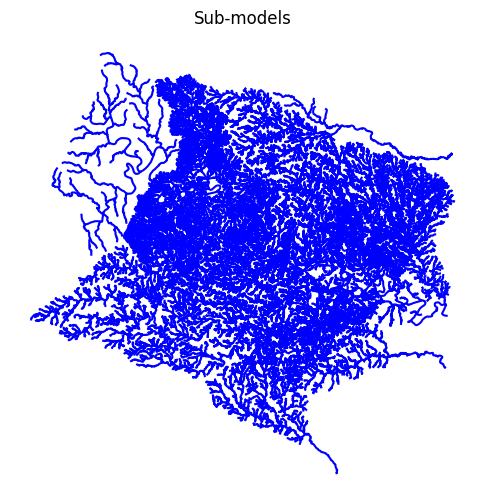

In [3]:
# Plot model collection with sub-models in different colors
fig, ax = plt.subplots(figsize=(6,6))
for model_name, model in model_collection.models.items():
    model.plot(ax=ax, c='b')
plt.axis('off')
plt.title('Sub-models')

In [4]:
# Get models for waller and shoal
waller = model_collection.models['WLR']
shoal = model_collection.models['SHL']

# Remove downstream sinks
waller.sinks = []
shoal.sinks = []

# Create model collection for each watershed
waller_container = ModelCollection([waller], name='waller')
shoal_container = ModelCollection([shoal], name='shoal')

In [5]:
# Write models to new files
waller_container.dump_model_collection('../data/waller_densified.json')
shoal_container.dump_model_collection('../data/shoal_densified.json')

In [6]:
# Read dumped model files
waller_container = ModelCollection.from_file('../data/waller_densified.json')
shoal_container = ModelCollection.from_file('../data/shoal_densified.json')

Text(0.5, 1.0, 'Waller')

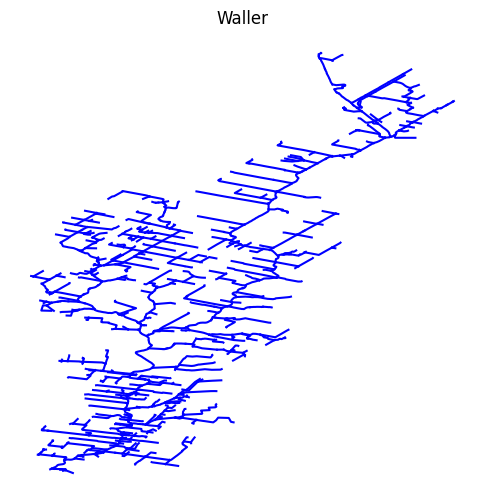

In [7]:
# Waller creek
fig, ax = plt.subplots(figsize=(6,6))
for model_name, model in waller_container.models.items():
    model.plot(ax=ax, c='b')
plt.axis('off')
plt.title('Waller')

Text(0.5, 1.0, 'Shoal')

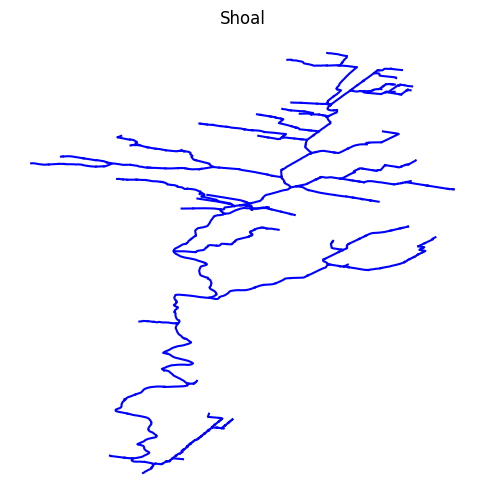

In [8]:
# Shoal creek
fig, ax = plt.subplots(figsize=(6,6))
for model_name, model in shoal_container.models.items():
    model.plot(ax=ax, c='b')
plt.axis('off')
plt.title('Shoal')
